In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"C:/Users/M11021001/OneDrive - 國立雲林科技大學/Desktop/資料探勘/作業1/adult_clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  float64
 2   education       30162 non-null  float64
 3   education-num   30162 non-null  float64
 4   marital-status  30162 non-null  float64
 5   occupation      30162 non-null  float64
 6   relationship    30162 non-null  float64
 7   race            30162 non-null  float64
 8   sex             30162 non-null  int64  
 9   capital-gain    30162 non-null  float64
 10  capital-loss    30162 non-null  float64
 11  hours-per-week  30162 non-null  float64
 12  native-country  30162 non-null  float64
 13  income          30162 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 3.2 MB


In [25]:
y = df['income'].values
X = df.drop(labels=['income'], axis=1)
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
a = clf.score(X_train, y_train)
print(a)
b = clf.score(X_test, y_test)
print(b)

0.9794880862914991
0.8036069486805464


In [53]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5639
           1       0.61      0.60      0.61      1902

    accuracy                           0.80      7541
   macro avg       0.74      0.74      0.74      7541
weighted avg       0.80      0.80      0.80      7541



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

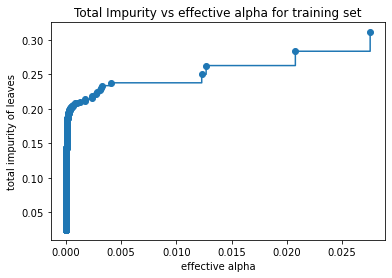

In [4]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [5]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06185697407271529


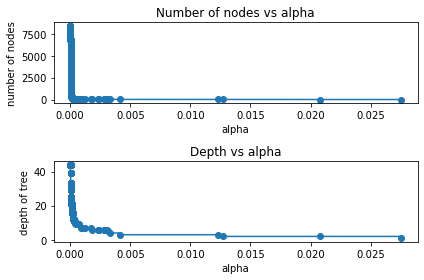

In [6]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

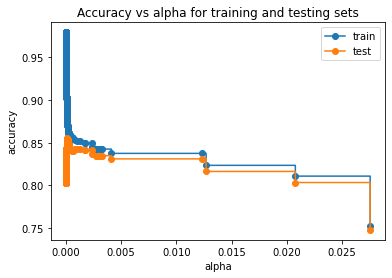

In [7]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
print(max(test_scores))
print(test_scores.index(max(test_scores)))
clfs[1488]

0.855059010741281
1488


DecisionTreeClassifier(ccp_alpha=0.00012630488736761666, random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

[0.7521771804959992, 0.8234826046593873, 0.8375845453339817, 0.8477078820564962, 0.8535431678528801, 0.8561513637770214, 0.85818487246364, 0.8595552804915786, 0.8619424428628266, 0.8647716723398612, 0.8669378011582158, 0.8684850360284692, 0.8692807568188851, 0.8706069581362451, 0.8718889527430264, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157, 0.8735688077450157]
0.8735688077450157
16

[0.7477788091765017, 0.8173982230473412, 0.8311894974141361, 0.8380851345975335, 0.8421959952260973, 0.8518764089643284, 0.8589046545550988, 0.8635459488131547, 0.8709720196260443, 0.8799893913274102, 0.8862219864739425, 0.8941784909163241, 0.9016045617292137, 0.908102373690492, 0.9167219201697387, 0.9196393051319454, 0.9281262432038191, 0.9306458029439066

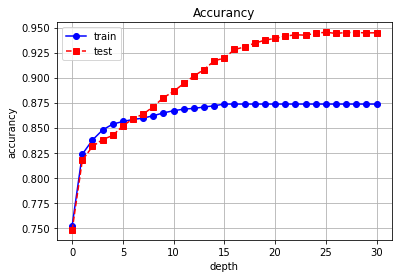

In [45]:
list1 = []
list2 = []
k = 0
while k <= 30:
    k = k+1
    clf1 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.00012630488736761666,max_depth=k)
    clf1.fit(X_train, y_train)
    list1.append(clf1.score(X_train,y_train))
    clf1.fit(X_test, y_test)
    list2.append(clf1.score(X_test,y_test))

print(list1)
print(max(list1))
print(list1.index(max(list1))+1)
print()

print(list2)
print(max(list2))
print(list2.index(max(list2))+1)

# 绘制第一条折线
plt.plot(list1, label='train', linestyle='-', marker='o', color='b')

# 绘制第二条折线
plt.plot(list2, label='test', linestyle='--', marker='s', color='r')

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('Accurancy')
plt.xlabel('depth')
plt.ylabel('accurancy')

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

In [52]:
MaxDepth = [3, 15, 20]

for depth in MaxDepth:
    clf4 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.00012630488736761666, max_depth=depth)
    clf4.fit(X_train, y_train)
    print(classification_report(y_test, clf4.predict(X_test)))
#     tree.plot_tree(clf4)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5639
           1       0.77      0.47      0.58      1902

    accuracy                           0.83      7541
   macro avg       0.81      0.71      0.74      7541
weighted avg       0.82      0.83      0.82      7541

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5639
           1       0.73      0.66      0.69      1902

    accuracy                           0.85      7541
   macro avg       0.81      0.79      0.80      7541
weighted avg       0.85      0.85      0.85      7541

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5639
           1       0.74      0.65      0.69      1902

    accuracy                           0.86      7541
   macro avg       0.81      0.79      0.80      7541
weighted avg       0.85      0.86      0.85      7541



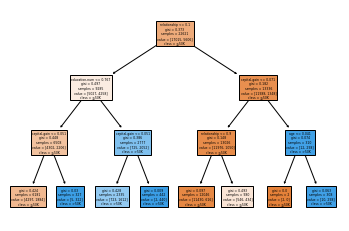

In [36]:
fn=df.columns[:]
cn=["≦50K", ">50K"]
plt.figure()
tree.plot_tree(clf4, feature_names = fn, class_names=cn, filled=True)
plt.savefig('tree1.pdf')